<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson1/GB_molecular_Biology_Genetic_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 1. База данных NCBI
Скачайте файл curated_gene_disease_associations.tsv.gz на ПК. В этом файле содержится список генов и ассоциированных с ними болезней. Что требуется сделать:
- Выберите любое из заболеваний, которое есть в списке.
- В отдельную таблицу извлеките все гены, которые связаны с избранным заболеванием.
- Для одного из генов извлеките отдельно информацию о 2–3 характеристиках на выбор, а также добавьте вырезанную по координатам последовательность гена.

Пример выполнения — в файле Task1.ipynb. Сделанное практическое задание предоставляется в формате .ipynb.

Файл ipynb. для скачивания https://colab.research.google.com/drive/1gpyi5Kdw8xEJccm1Xzsjq95JF_V7fLAC

In [126]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "nedokormysh@live.com"
import pandas as pd
import xml.etree.ElementTree as ET

In [128]:
# dis = pd.read_table('/content/curated_gene_disease_associations.tsv')
dis = pd.read_table('https://github.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/raw/lesson1/curated_gene_disease_associations_june_4_2020.tsv.gz')
dis = dis[['geneId',	'geneSymbol',	'DSI',	'DPI',	'diseaseId',	'diseaseName',	'diseaseType',	'diseaseClass']]
dis.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04


## Для одного гена


- Выберите любое из заболеваний, которое есть в списке.
- В отдельную таблицу извлеките все гены, которые связаны с избранным заболеванием.

In [129]:
thalassemia_minor_db = dis.loc[dis['diseaseName'] == 'Thalassemia Minor']
thalassemia_minor_db

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
7019,790,CAD,0.482,0.846,C0085578,Thalassemia Minor,disease,C16;C15
14533,1723,DHODH,0.576,0.769,C0085578,Thalassemia Minor,disease,C16;C15
16962,2056,EPO,0.381,0.885,C0085578,Thalassemia Minor,disease,C16;C15
23735,3040,HBA2,0.512,0.808,C0085578,Thalassemia Minor,disease,C16;C15
23764,3043,HBB,0.494,0.808,C0085578,Thalassemia Minor,disease,C16;C15
31216,3934,LCN2,0.405,0.885,C0085578,Thalassemia Minor,disease,C16;C15
51923,7036,TFR2,0.585,0.615,C0085578,Thalassemia Minor,disease,C16;C15
51958,7037,TFRC,0.437,0.885,C0085578,Thalassemia Minor,disease,C16;C15
55035,7372,UMPS,0.584,0.615,C0085578,Thalassemia Minor,disease,C16;C15
59037,8912,CACNA1H,0.628,0.423,C0085578,Thalassemia Minor,disease,C16;C15


In [130]:
gene_id_lst = thalassemia_minor_db['geneId'].tolist()
gene_id_lst

[790, 1723, 2056, 3040, 3043, 3934, 7036, 7037, 7372, 8912, 57817, 109580095]



Талассемия – это генетическая болезнь крови, при которой, из-за мутации генов, образовывается недостаточное количество гемоглобина в организме и происходит деформация эритроцитов.

Болезнь выбрал наугад. В видео сказано, что непонятно как выбрать id гена, если не заходить на сайт. Но вроде как id гена из графы id совпадает с кодом в базе данных Entrez.

Например, взял ген CAD.

In [131]:
dis.loc[7019]

geneId                        790
geneSymbol                    CAD
DSI                         0.482
DPI                         0.846
diseaseId                C0085578
diseaseName     Thalassemia Minor
diseaseType               disease
diseaseClass              C16;C15
Name: 7019, dtype: object

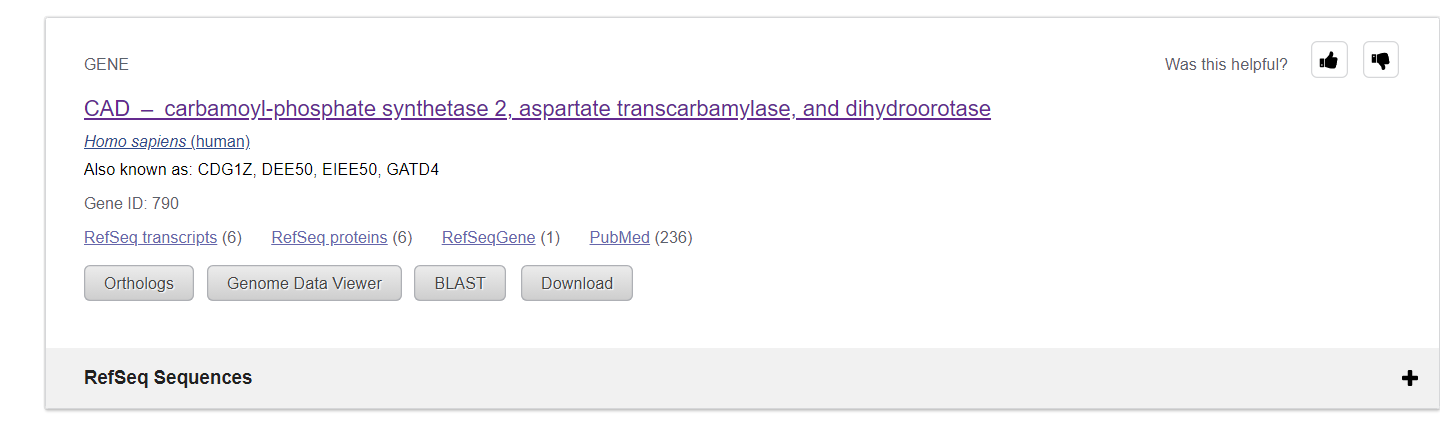


- Для одного из генов извлеките отдельно информацию о 2–3 характеристиках на выбор, а также добавьте вырезанную по координатам последовательность гена.

In [132]:
handle = Entrez.efetch(db="gene", id="790", rettype = 'xml') # получаем данные о выбранном гене (база, id, тип поиска)
gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus") # парсим данные локуса, где лежит этот ген
region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval") # парсим регион, где лежит этот ген
start = int(region.find("Seq-interval_from").text) + 1
end = int(region.find("Seq-interval_to").text) + 1
gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
strand = region.find("Seq-interval_strand/Na-strand").get("value")
print(start, end, gi_id, strand)

27217369 27243943 568815596 plus


ещё одна проверка, что ген id совпадает

In [133]:
handle = Entrez.esummary(db="gene", id=790, rettype = 'xml')
record = Entrez.read(handle)
record['DocumentSummarySet']['DocumentSummary'][0]['Name']

'CAD'

In [137]:
id_chrom = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']

In [138]:
#Выгрузить с NCBI нуклеотидную последовательность X хромосомы, для этого узнать ID хромосомы - NC_000023.11
handle = Entrez.efetch(db="nucleotide",
                       id=id_chrom, 
                       rettype = 'fasta',
                       retmode = 'text')
#загружаем
chromosome = SeqIO.read(handle, 'fasta')

In [139]:
#а та ли это хромосома?
chromosome.description

'NC_000002.12 Homo sapiens chromosome 2, GRCh38.p14 Primary Assembly'

In [140]:
#вырезаем из хромосомы ген, для этого узнаем локацию нужного гена. Для CAD это 27217369..27243943
geneCAD = chromosome.seq[start:end]
print(geneCAD)
len(geneCAD)

GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGGCTTCTCTCCAGCGCCCCGCGCCGTTAGCCACGTGGACCGACTCCGGCGCGCCGTCCTCACGTGGTTCCAGTGGAGTTTGCAGTCCTTCCCGCTTCTCCGTACTCGCCCCCGCCTCTGAGCTCCCTTCCCATGGCGGCCCTAGTGTTGGAGGACGGGTCGGTCCTGCGGGGCCAGCCCTTTGGGGCCGCCGTGTCGACTGCCGGGGAAGTGGGTAAGCAAGCCCGGTTAGGCTGCAGACCTTATCCCACTCTGTGATGCGCCTCTCCTCCCAACCTTCCCCGTCCAGACCCCGCCATTTTCCCGCCAGCGTACCCCCTTCCCCCATTCGGTGCCCATGGGCCCCAGCGCCATAAACCCCTCGCGACCAAGGCAGCCTCCACTGGGGCGTGCTCATCGCGCGGGGAGTGTTCCGAAGGGTGCCCTACCGGAGCCCAGCCCTGCTTCTTTCTTGCAGTGTTTCAAACCGGCATGGTCGGCTACCCCGAGGCCCTCACTGATCCCTCCTACAAGGCACAGATCTTAGTGCTCACCTATCCTCTGATCGGCAACTATGGCATCCCCCCAGATGAAATGGATGAGTTCGGTCTCTGCAAGGTAGCCACACCCAGTGCTTTCTCTACATTCCTTTTCAAGTCAGTAATTGTTAACTATTAGTGAAGTAGGAGACGTTGACACCCTGCTGGGCATCCTGCAGAAAACATACCCACTGAAGTAGTAAAGTCAAGGACTAAGATCACTAGTAACTGTAGTTAGGGGTTGTTAAGTGCCTTGGGAGGCACAGAGTGTTGGAGGCCTCAGGAAAAAGCTACCGCCTTTGTTAAGGGCATCAAGGCTCCAGGTATAGCTGAAAGCATTCTGTATGTAGTGAAGGCATGGATCAAGGAAAAGTAAAAGAGGTGTAAGGGAACAGCCTTGTCCAACTTGTTAGGCATGCAGAAGTCAGGAGA

26574

## Для всех генов из таблицы

In [157]:
gene_info = thalassemia_minor_db[['geneId',	'geneSymbol']]
gene_info

,geneId,geneSymbol
7019,790,CAD
14533,1723,DHODH
16962,2056,EPO
23735,3040,HBA2
23764,3043,HBB
31216,3934,LCN2
51923,7036,TFR2
51958,7037,TFRC
55035,7372,UMPS
59037,8912,CACNA1H


In [172]:
def get_gene_info(row):
    gene_id = row['geneId']
    handle = Entrez.efetch(db="gene", id=gene_id, rettype = 'xml')
    gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
    region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
    start = int(region.find("Seq-interval_from").text) + 1
    end = int(region.find("Seq-interval_to").text) + 1
    gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
    strand = region.find("Seq-interval_strand/Na-strand").get("value")


    handle = Entrez.esummary(db="gene", id=gene_id, rettype = 'xml')
    record = Entrez.read(handle)
    chrom_num = record['DocumentSummarySet']['DocumentSummary'][0]['Chromosome']
    mapLoc = record['DocumentSummarySet']['DocumentSummary'][0]['MapLocation']
    ID_chr = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']

    handle = Entrez.efetch(db="nucleotide",
                       id=ID_chr, 
                       rettype = 'fasta',
                       retmode = 'text')
    
    chromosome = SeqIO.read(handle, 'fasta')
    gene = chromosome.seq[start: end]
   
    row['start'], row['end'], row['gi_id'], row['strand'], row['chrom_num'],\
    row['mapLoc'], row['ID chromosome'], row['gene lenght'], row['gene'] = start, end, gi_id, strand, chrom_num, mapLoc, ID_chr, len(gene), gene

    return row

Найдём информацию для каждого гена и добавим эту информацию в таблицу.

In [179]:
gene_info = gene_info.apply(get_gene_info, axis=1)
gene_info

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
7019,790,CAD,27217369,27243943,568815596,plus,2,2p23.3,NC_000002.12,26574,"(G, T, C, T, C, T, G, C, T, G, C, T, G, C, C, ..."
14533,1723,DHODH,72008744,72027659,568815582,plus,16,16q22.2,NC_000016.10,18915,"(G, G, C, T, T, A, A, T, G, A, C, G, G, A, A, ..."
16962,2056,EPO,100720468,100723700,568815591,plus,7,7q22.1,NC_000007.14,3232,"(C, T, T, T, C, C, C, A, G, A, T, A, G, C, A, ..."
23735,3040,HBA2,172876,173710,568815582,plus,16,16p13.3,NC_000016.10,834,"(C, T, C, T, T, C, T, G, G, T, C, C, C, C, A, ..."
23764,3043,HBB,5225464,5227071,568815587,minus,11,11p15.4,NC_000011.10,1607,"(T, G, C, A, A, T, G, A, A, A, A, T, A, A, A, ..."
31216,3934,LCN2,128149453,128153453,568815589,plus,9,9q34.11,NC_000009.12,4000,"(C, T, C, G, C, C, A, C, C, T, C, C, T, C, T, ..."
51923,7036,TFR2,100620420,100641552,568815591,minus,7,7q22.1,NC_000007.14,21132,"(T, A, T, T, G, A, T, A, T, C, A, G, G, T, G, ..."
51958,7037,TFRC,196049284,196082090,568815595,minus,3,3q29,NC_000003.12,32806,"(C, A, G, T, G, T, T, T, A, A, G, T, A, T, T, ..."
55035,7372,UMPS,124730452,124749273,568815595,plus,3,3q21.2,NC_000003.12,18821,"(A, A, A, C, A, G, G, C, A, G, C, G, C, G, C, ..."
59037,8912,CACNA1H,1153106,1221768,568815582,plus,16,16p13.3,NC_000016.10,68662,"(G, C, C, C, G, A, A, G, T, T, T, C, C, T, G, ..."


In [180]:
gene_info.to_csv('gene_info.csv', index=False)

In [181]:
df = pd.read_csv('/content/gene_info.csv')
df.head()

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
0,790,CAD,27217369,27243943,568815596,plus,2,2p23.3,NC_000002.12,26574,GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCG...
1,1723,DHODH,72008744,72027659,568815582,plus,16,16q22.2,NC_000016.10,18915,GGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGAG...
2,2056,EPO,100720468,100723700,568815591,plus,7,7q22.1,NC_000007.14,3232,CTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCGG...
3,3040,HBA2,172876,173710,568815582,plus,16,16p13.3,NC_000016.10,834,CTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTGT...
4,3043,HBB,5225464,5227071,568815587,minus,11,11p15.4,NC_000011.10,1607,TGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTCA...
